In [1]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
import os
print(os.listdir("../input"))

['training_set', 'test_set']


(280, 300, 3)


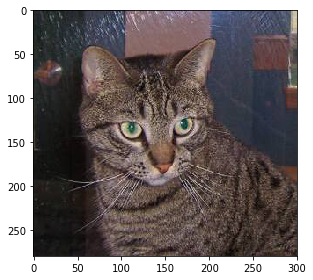

In [3]:
# show the first cat in dataset
from skimage import io
cat1 = io.imread('../input/training_set/training_set/cats/cat.1.jpg')
io.imshow(cat1)
print(cat1.shape)

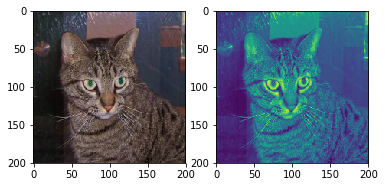

In [4]:
from skimage.transform import resize
cat1_ = resize(cat1, (200,200,3))
from skimage.color import rgb2gray
cat1_gs = rgb2gray(cat1_)

import matplotlib.pyplot as plt
fig=plt.figure()
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(cat1_)
fig.add_subplot(rows, columns, 2)
plt.imshow(cat1_gs)
plt.show()

In [5]:
# Get the first 100 images of cat and dog to train
x = []
y = []
for i in range(1,101):
    cat = rgb2gray(resize(io.imread('../input/training_set/training_set/cats/cat.{}.jpg'.format(i)), (200,200)))
    x.append(cat)
    y.append(0)

for i in range(1,101):
    dog = rgb2gray(resize(io.imread('../input/training_set/training_set/dogs/dog.{}.jpg'.format(i)), (200,200)))
    x.append(dog)
    y.append(1)

x, y = np.asarray(x), np.asarray(y) 
print('x shape: ', x.shape, 'y shape: ', y.shape)

x shape:  (200, 200, 200) y shape:  (200,)


In [6]:
class NearestNeighbor(object):
    def __init__(self):
        pass

    def fit(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y

    def predict(self, X, k):
        # find the nearest training image to the i'th test image
        # using the L1 distance (sum of absolute value differences)
        distances = [np.sum(np.abs(self.Xtr[i] - X)) for i in range(0, len(self.Xtr))]
        #print(distances)
        min_indexs = np.argsort(distances)[:k]
        #print(min_indexs)
        y_ = self.ytr[min_indexs]
        #print(y_)
        counts = np.bincount(y_)
        #print(np.argmax(counts))
        return np.argmax(counts)

In [7]:
knn = NearestNeighbor()
knn.fit(x,y)
results_100 = []
for k in (1,2,3,5,10):
    print('k = ',k)
    for i in range(1,1001):
        results_100.append(knn.predict(rgb2gray(resize(io.imread('../input/test_set/test_set/dogs/dog.{}.jpg'.format(4000+i)), (200,200))),5))
    unique, counts = np.unique(results_100, return_counts=True)
    print(dict(zip(unique, counts)))

k =  1
{0: 405, 1: 595}
k =  2
{0: 810, 1: 1190}
k =  3
{0: 1215, 1: 1785}
k =  5
{0: 1620, 1: 2380}
k =  10
{0: 2025, 1: 2975}
